In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from scipy import stats
import seaborn as sns


In [60]:
df = pd.read_csv("googleplaystore.csv")

In [61]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [62]:
df.shape

(10841, 13)

In [63]:
df.info()              
#df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [64]:
#Droping Null Values
df = df.dropna(axis=0)

In [65]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [66]:
#Duplicate Apps
df.shape[0]- len(df['App'].unique())

1170

In [67]:
#Droping Duplicates
df.drop_duplicates("App", inplace=True)
print("Now Duplicate Apps = "+str(df.shape[0]- len(df['App'].unique())))

Now Duplicate Apps = 0


In [68]:
#Removing + and , from installs
df["Installs"] = df["Installs"].apply(lambda x: x.replace('+', ''))
df["Installs"] = df["Installs"].apply(lambda x: x.replace(',', ''))

In [69]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [70]:
#Removing M and , from Size
df["Size"] = df["Size"].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df["Size"] = df["Size"].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df["Size"] = df["Size"].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)

In [71]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [72]:
#Converting size of apps to MB
df["Size"] = df["Size"].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)

In [101]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [102]:
#convert installs and number of reviews to type int (Can noise can be added to installs ?)
df["Installs"] = df["Installs"].astype("int")
df["Reviews"] = df["Reviews"].astype("int")

In [103]:
df.dropna(axis=0, inplace=True)
#Convert Size to float
df["Size"] = df["Size"].astype("float")

In [104]:
#Removing $ from Price
df["Price"] = df["Price"].apply(lambda x: x.replace('$', ''))
df["Price"] = df["Price"].astype("float")

In [105]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [106]:
df.Category.value_counts()

FAMILY                 1607
GAME                    912
TOOLS                   717
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
EDUCATION               118
MAPS_AND_NAVIGATION     118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

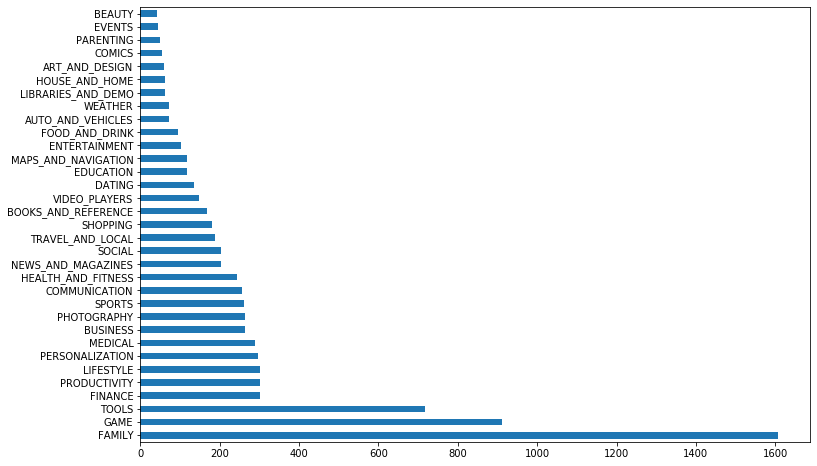

In [107]:
df.Category.value_counts().plot(kind='barh',figsize= (12,8))

### Insight: Maximum Number of Apps belong to the Family and Game Category.

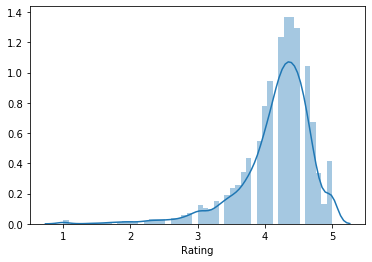

In [108]:
# df.Rating.describe()

sns.distplot(df.Rating)

### Insight : Most of the apps, clearly hold a rating above 4  And surprisingly a lot seem to have 5 rating.

In [109]:
# df["Reviews"].mean()
df[(df.Reviews>255436) & (df.Rating == 5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [110]:
df[(df.Reviews>25543600)]    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1670,Clash of Clans,GAME,4.6,44891723,98.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,NaN,500000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device


 ### None of them have rating 5

In [111]:
df[df.Rating == 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.00000,1000,Free,0.00,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.40000,1000,Free,0.00,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70.00000,100,Free,0.00,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.30000,500,Free,0.00,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.00000,100,Free,0.00,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
640,Online Girls Chat Group,DATING,5.0,5,5.00000,100,Free,0.00,Mature 17+,Dating,"August 2, 2018",8.2,4.0.3 and up
654,Speeding Joyride & Car Meet App,DATING,5.0,3,25.00000,100,Free,0.00,Mature 17+,Dating,"July 20, 2018",1.2.9,4.1 and up
1028,SUMMER SONIC app,EVENTS,5.0,4,61.00000,500,Free,0.00,Everyone,Events,"July 24, 2018",1.0,4.4 and up
1030,Prosperity,EVENTS,5.0,16,2.30000,100,Free,0.00,Everyone,Events,"July 9, 2018",1.14,2.0 and up
1038,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21.00000,100,Free,0.00,Everyone,Events,"July 3, 2018",1.0.5,4.4 and up


In [39]:
df[(df.Rating == 5) & (df.Reviews >= 30) & (df.Installs > 100) ].App.count()

12

### Only 12 apps with 5 Star Rating with sufficient reviews and installs

In [40]:
#take a look at the apps priced more than 100
expensive_apps = df[df["Price"]>100]
expensive_apps["Installs"].groupby(expensive_apps["App"]).sum()

App
I AM RICH PRO PLUS                  1000
I Am Rich                          10000
I Am Rich Premium                  50000
I Am Rich Pro                       5000
I am Rich                           5000
I am Rich Plus                     10000
I am Rich!                          1000
I am extremely Rich                 1000
I am rich                         100000
I am rich (Most expensive app)      1000
I am rich VIP                      10000
I am rich(premium)                  5000
I'm Rich - Trump Edition           10000
most expensive app (H)               100
💎 I'm rich                         10000
Name: Installs, dtype: int32

In [41]:
df_tr = df
#Standardize
clmns = ['Rating', 'Installs']
df_tr_std = stats.zscore(df_tr[clmns])
df_tr_std

array([[-0.13662525, -0.15723193],
       [-0.50930161, -0.14882253],
       [ 0.98140384, -0.07159337],
       ...,
       [ 1.54041839, -0.15740184],
       [ 0.60872748, -0.15738639],
       [ 0.60872748,  0.01421681]])

In [42]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_tr_std)
labels = kmeans.labels_
df_tr['clusters'] = labels
#Add the column into our list
clmns.extend(['clusters'])
clmns

['Rating', 'Installs', 'clusters']

In [43]:
#Lets analyze the clusters
df_tr[clmns].groupby(['clusters']).mean()

,Rating,Installs
clusters,,
0,4.529281,7.172939e+06
1,4.215000,1.000000e+09
2,2.894142,5.565420e+05
3,3.973677,3.783617e+06
4,4.375000,5.000000e+08


In [44]:
#0   -   4.3 +
#1   -   3.1 - 4.5
#2   -   1 - 3.4
#3   -   3.5 - 4.2
#4   -   4 - 4.7
df_tr


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,clusters
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.000000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.000000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,3
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.000000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100000,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,0


In [118]:
df_tr["clusters"].unique()

array([3, 0, 2, 1, 4], dtype=int64)

In [119]:
df_tr["clusters"].value_counts()

0    4310
3    3119
2     717
4      24
1      20
Name: clusters, dtype: int64

In [120]:
df_tr[(df_tr['clusters']==4)].max()

App               imo free video calls and chat
Category                          VIDEO_PLAYERS
Rating                                      4.7
Reviews                                42916526
Size                                         74
Installs                              500000000
Type                                       Free
Price                                         0
Content Rating                             Teen
Genres                  Video Players & Editors
Last Updated                       May 25, 2018
Current Ver                  Varies with device
Android Ver                  Varies with device
clusters                                      4
dtype: object

In [49]:
df1 = df_tr[['Rating', 'Installs', 'clusters']]